In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


문서 유사도 측정 방법 - 코사인 유사도

- A와 B는 벡터
- 내적(A, B)은 A와 B의 내적입니다.
- ||아|| 그리고 ||비|| 는 각각 벡터 A와 B의 유클리드 규범(또는 길이)입니다.

In [14]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm

    return similarity

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [22]:
print(feature_vect_simple[:5])  # 희소 행렬의 첫 5개 데이터 출력
print(feature_vect_simple.toarray())  # 밀집 행렬로 변환하여 전체 데이터 출력


  (0, 2)	0.41556360057939173
  (0, 13)	0.41556360057939173
  (0, 8)	0.24543855687841593
  (0, 0)	0.41556360057939173
  (0, 15)	0.49087711375683185
  (0, 14)	0.24543855687841593
  (0, 17)	0.24543855687841593
  (0, 6)	0.24543855687841593
  (1, 16)	0.39624495215024286
  (1, 7)	0.39624495215024286
  (1, 12)	0.39624495215024286
  (1, 10)	0.3013544995034864
  (1, 8)	0.2340286519091622
  (1, 15)	0.2340286519091622
  (1, 14)	0.2340286519091622
  (1, 17)	0.4680573038183244
  (1, 6)	0.2340286519091622
  (2, 3)	0.3098560092999078
  (2, 4)	0.3098560092999078
  (2, 9)	0.3098560092999078
  (2, 1)	0.3098560092999078
  (2, 5)	0.3098560092999078
  (2, 11)	0.3098560092999078
  (2, 10)	0.23565348175165166
  (2, 8)	0.1830059506093466
  (2, 15)	0.3660119012186932
  (2, 14)	0.1830059506093466
  (2, 17)	0.3660119012186932
  (2, 6)	0.1830059506093466
[[0.4155636  0.         0.4155636  0.         0.         0.
  0.24543856 0.         0.24543856 0.         0.         0.
  0.         0.4155636  0.24543856 0.4908

In [6]:
# sparse matrix - 대부분의 요소가 0으로 채워진 행렬임

list(feature_vect_simple)

[<1x18 sparse matrix of type '<class 'numpy.float64'>'
 	with 8 stored elements in Compressed Sparse Row format>,
 <1x18 sparse matrix of type '<class 'numpy.float64'>'
 	with 9 stored elements in Compressed Sparse Row format>,
 <1x18 sparse matrix of type '<class 'numpy.float64'>'
 	with 12 stored elements in Compressed Sparse Row format>]

In [17]:
# TfidVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환.
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [18]:
feature_vect_dense

matrix([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
         0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
         0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
         0.49087711, 0.        , 0.24543856],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.23402865, 0.39624495, 0.23402865, 0.        ,
         0.3013545 , 0.        , 0.39624495, 0.        , 0.23402865,
         0.23402865, 0.39624495, 0.4680573 ],
        [0.        , 0.30985601, 0.        , 0.30985601, 0.30985601,
         0.30985601, 0.18300595, 0.        , 0.18300595, 0.30985601,
         0.23565348, 0.30985601, 0.        , 0.        , 0.18300595,
         0.3660119 , 0.        , 0.3660119 ]])

In [20]:
feature_vect_dense[0]

matrix([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
         0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
         0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
         0.49087711, 0.        , 0.24543856]])

In [21]:
vect1

array([0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
       0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
       0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
       0.49087711, 0.        , 0.24543856])

In [24]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


In [26]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [28]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [29]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


In [35]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [33]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [38]:
import pandas as pd
import glob ,os
from sklearn.cluster import KMeans
pd.set_option('display.max_colwidth', 700)

path = r'/content/drive/Othercomputers/내 컴퓨터/hmkd1/dataset/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, encoding='latin1')
     # filename_ = file_.split('\\')[-1]    # local-windows
    filename_ = file_.split('/')[-1]    #colab
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                            ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [45]:
document_df.head(2)

,filename,opinion_text,cluster_label
0,rooms_bestwestern_hotel_sfo,"Great Location , Nice Rooms , H...",1
1,food_swissotel_chicago,The food for our event was delicious .\n0 ...,1


In [42]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([0, 1, 8, 10, 13, 16, 20, 21, 24, 25, 30, 31, 35, 44, 49, 50], dtype='int64')
##### 비교 기준 문서명  rooms_bestwestern_hotel_sfo  와 타 문서 유사도######
[[1.         0.15182557 0.14089226 0.38250699 0.26090251 0.81484367
  0.1309058  0.22310085 0.86779235 0.38038865 0.37985741 0.12310729
  0.28580438 0.31702767 0.27181547 0.28758074]]


In [48]:
hotel_indexes

Int64Index([0, 1, 8, 10, 13, 16, 20, 21, 24, 25, 30, 31, 35, 44, 49, 50], dtype='int64')

Text(0.5, 1.0, 'rooms_bestwestern_hotel_sfo')

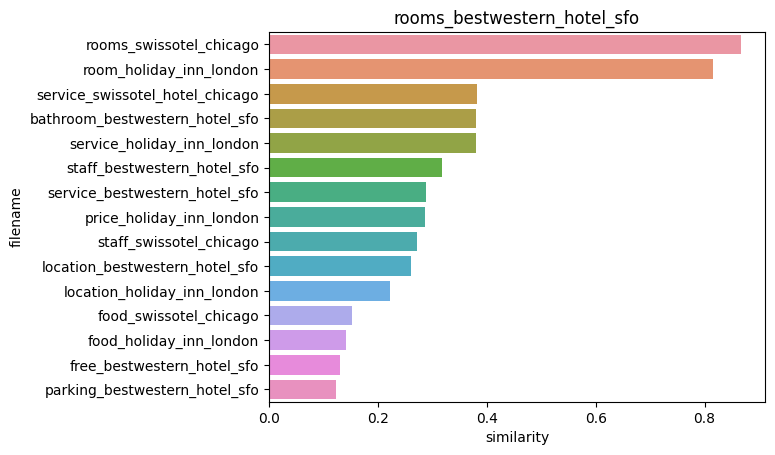

In [43]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외.
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬.
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)